<a href="https://colab.research.google.com/github/rameenhamad/Elvovo_ML_Internship_Tasks/blob/main/2_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [26]:
df = pd.read_csv("/content/drive/MyDrive/Elvovo_Tasks/2.Customer_Segmantation/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [111]:
df.isnull().sum()
df.shape

(200, 6)

In [29]:
df['Genre'].unique()

array(['Male', 'Female'], dtype=object)

In [30]:
df['Genre'] = df['Genre'].map({"Male" : 0, "Female" : 1})

In [112]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   CustomerID      200 non-null    int64
 1   Genre           200 non-null    int64
 2   Age             200 non-null    int64
 3   Annual Income   200 non-null    int64
 4   Spending Score  200 non-null    int64
 5   Clusters        200 non-null    int32
dtypes: int32(1), int64(5)
memory usage: 8.7 KB


In [109]:
features = df[['Genre',	'Age',	'Annual Income',	'Spending Score']]
features.head()

,Genre,Age,Annual Income,Spending Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


Determine optimal number of clusters

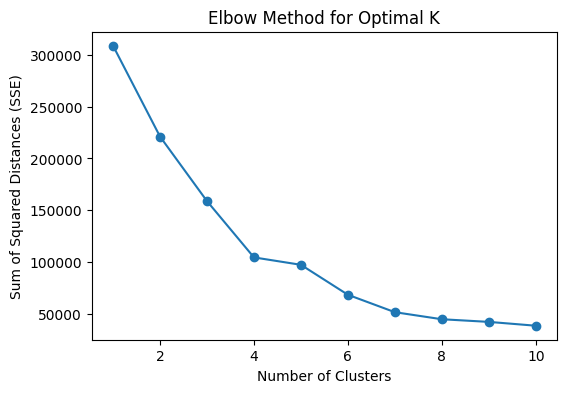

In [110]:
sse = []
k_range = range(1,11)

for k in k_range:
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(features)
  sse.append(km.inertia_)
plt.figure(figsize=(6,4))
plt.plot(k_range, sse, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Distances (SSE)")
plt.title("Elbow Method for Optimal K")
plt.show()

K-Means clustering

In [103]:
kmeans = KMeans(n_clusters=6, random_state=42)
df["Clusters"] = kmeans.fit_predict(features)
df.head(3)

,CustomerID,Genre,Age,Annual Income,Spending Score,Clusters
0,1,0,19,15,39,5
1,2,0,21,15,81,2
2,3,1,20,16,6,5


Clusters Visualization

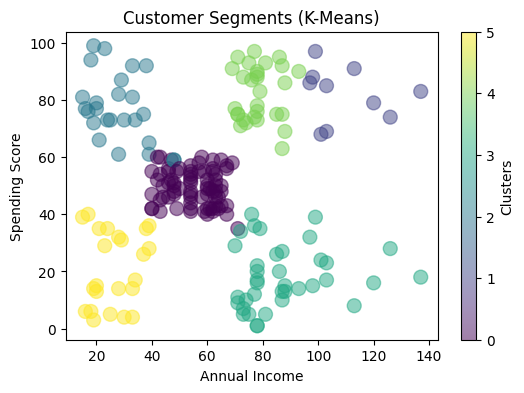

In [104]:
plt.figure(figsize=(6,4))
plt.scatter(df['Annual Income'], df['Spending Score'], c=df['Clusters'], cmap="viridis", marker="o", s=100, alpha=0.5)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Segments (K-Means)")
plt.colorbar(label='Clusters')
plt.show()

Average Spending

In [105]:
print(df.groupby('Clusters')[['Annual Income','Spending Score']].mean())

          Annual Income  Spending Score
Clusters                               
0             55.210526       49.447368
1            109.700000       82.000000
2             28.040000       77.000000
3             87.432432       18.189189
4             78.551724       82.172414
5             26.304348       20.913043
